## 配合課程影片 hmwu_StatR-01-2
### Exercise 1-2

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import random

In [2]:
n = 6 
p = 10 
np.random.seed(123456)

In [3]:
# 請生成 p*p 共變異數矩陣 sigma，每個元素值來自於常態分佈的隨機抽樣：
sigma = np.random.normal(0, 1, (p, p))
sigma

array([[ 0.4691123 , -0.28286334, -1.5090585 , -1.13563237,  1.21211203,
        -0.17321465,  0.11920871, -1.04423597, -0.86184896, -2.10456922],
       [-0.49492927,  1.07180381,  0.72155516, -0.70677113, -1.03957499,
         0.27185989, -0.42497233,  0.56702035,  0.27623202, -1.08740069],
       [-0.67368971,  0.11364841, -1.47842655,  0.52498767,  0.40470522,
         0.57704599, -1.71500202, -1.03926848, -0.37064686, -1.15789225],
       [-1.34431181,  0.84488514,  1.07576978, -0.10904998,  1.64356307,
        -1.46938796,  0.35702056, -0.6746001 , -1.77690372, -0.96891381],
       [-1.29452359,  0.41373811,  0.27666171, -0.47203451, -0.01395975,
        -0.36254299, -0.00615357, -0.92306065,  0.8957173 ,  0.80524403],
       [-1.20641178,  2.56564595,  1.43125599,  1.34030885, -1.1702988 ,
        -0.22616928,  0.41083451,  0.81385029,  0.13200317, -0.82731694],
       [-0.07646702, -1.18767758,  1.1301273 , -1.43673732, -1.41368087,
         1.60792047,  1.02418016,  0.56960526

In [4]:
sigma_1 = np.dot(sigma.transpose(), sigma)
np.fill_diagonal(sigma_1, sigma_1.diagonal()+0.1)

#diagonal = 0.1 * np.eye(len(sigma_1))
#sigma_2 = sigma_1 + diagonal

print(sigma_1.shape)
#print(diagonal.shape)
print(sigma_1.diagonal())

(10, 10)
[ 6.95855325 14.41909224 10.3193608   6.47409233 14.85423432 10.05981556
  7.38125867  7.64045047 11.01732561 15.89999288]


In [5]:
# 請模擬生成維度 n 的多元常態分佈隨機樣本資料 x，共變異數矩陣令為sigma_1：
x = np.random.multivariate_normal(mean = np.repeat(0, repeats = p), cov = sigma_1, size = (n), check_valid = "warn")

# (6, 10)
print(x.shape)

(6, 10)


In [6]:
# 請估計隨機樣本資料 x 的共變異數矩陣 s1：
from sklearn.covariance import ShrunkCovariance
import covar

s1 = np.cov(x.transpose())
s2 = ShrunkCovariance(shrinkage = 0.3257202).fit(x).covariance_
s3 = covar.cov_shrink_ss(x)[0]

In [7]:
# np.cov(x.transpose()):
# considers its input data matrix to have observations in each column, and variables in each row, so to get numpy.cov() to return what other packages do, you have to pass the transpose of the data matrix to numpy.cov().

In [8]:
s1

array([[ 3.32273521, -4.19733726, -0.68288317, -4.09154954,  0.14882015,
        -3.20072127,  1.42375464,  1.38289646, -1.81052893, -0.04543859],
       [-4.19733726,  7.47925002, -2.22146381,  4.17131208, -3.443407  ,
         2.80778097, -5.20344555, -0.86826328, -2.2567636 , -7.832705  ],
       [-0.68288317, -2.22146381, 14.53970401, -2.92041095, -1.07876523,
         2.3495807 , 12.3233969 ,  5.09447969,  9.62400247,  9.01442245],
       [-4.09154954,  4.17131208, -2.92041095, 16.06865565, 10.01317014,
         5.20238492, -8.41060523, -6.10189864,  1.17641304, 10.14825546],
       [ 0.14882015, -3.443407  , -1.07876523, 10.01317014, 14.98453151,
         1.97941578, -2.43580921, -6.7697619 ,  5.11076866, 19.99868289],
       [-3.20072127,  2.80778097,  2.3495807 ,  5.20238492,  1.97941578,
         3.86280624,  0.17329074, -1.79450589,  4.05371295,  4.70620927],
       [ 1.42375464, -5.20344555, 12.3233969 , -8.41060523, -2.43580921,
         0.17329074, 14.22362094,  4.73356042

In [9]:
s2

array([[ 5.36480756, -2.35848311, -0.38371194, -2.299041  ,  0.08362202,
        -1.79848475,  0.8000075 ,  0.77704929, -1.01733591, -0.02553194],
       [-2.35848311,  7.70035253, -1.24824014,  2.34385956, -1.93484982,
         1.57769166, -2.92381519, -0.48787699, -1.26807509, -4.40119563],
       [-0.38371194, -1.24824014, 11.66762046, -1.64097842, -0.606158  ,
         1.320229  ,  6.92451466,  2.86258729,  5.40772539,  5.06520247],
       [-2.299041  ,  2.34385956, -1.64097842, 12.52673812,  5.62639863,
         2.92321922, -4.72591768, -3.42865583,  0.66102629,  5.70230305],
       [ 0.08362202, -1.93484982, -0.606158  ,  5.62639863, 11.91756895,
         1.1122334 , -1.36868079, -3.80392808,  2.87174006, 11.23725658],
       [-1.79848475,  1.57769166,  1.320229  ,  2.92321922,  1.1122334 ,
         5.66827338,  0.09737204, -1.00833256,  2.27778063,  2.6444182 ],
       [ 0.8000075 , -2.92381519,  6.92451466, -4.72591768, -1.36868079,
         0.09737204, 11.49001343,  2.65978681

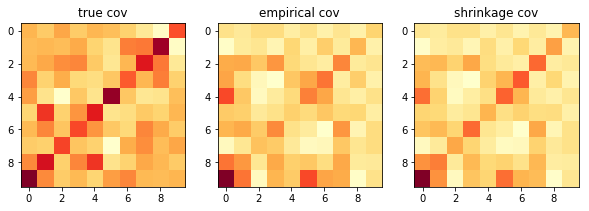

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize = (10, 6))

axes[0].imshow(sigma_1.transpose()[:, ::-1], cmap = 'YlOrRd')
axes[1].imshow(s1.transpose()[:, ::-1], cmap = 'YlOrRd')
axes[2].imshow(s2.transpose()[:, ::-1], cmap = 'YlOrRd')

axes[0].set_title('true cov')
axes[1].set_title('empirical cov')
axes[2].set_title('shrinkage cov')

plt.show()

In [11]:
## 判定矩陣是否為正定矩陣（Postivie Definite）

def is_positvie_definite(A):
    if np.array_equal(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
    
print("Sigma:", is_positvie_definite(sigma))
print("Sigma_1:", is_positvie_definite(sigma_1))
print("s1:", is_positvie_definite(s1))
print("s2:", is_positvie_definite(s2))

Sigma: False
Sigma_1: True
s1: False
s2: True


In [12]:
## Sum of Square of Difference (ssd)

ssd1 = ((sigma_1-s1)**2).sum()
ssd2 = ((sigma_1-s2)**2).sum()

print(ssd1)
print(ssd2)

3741.99814158775
1384.162684825725


In [13]:
# 請把 data.frame rc 的列名（rownames）改為true, empirical, shrinkage：

def rank_condition(A, eps = 1e-12):
    u, s, vh = np.linalg.svd(A)
    
    svd = np.array([x for x in s if abs(x) > eps])
    rank = len(svd)
    condition = svd.max()/svd.min()
    
    return rank, condition, svd

rc = pd.DataFrame(columns = ['Rank','Condition'], index = ['True', 'Empirical', 'Shrinkage'])
rc.loc["True"] = pd.Series({'Rank': rank_condition(sigma_1)[0], 'Condition': rank_condition(sigma_1)[1]})
rc.loc["Empirical"] = pd.Series({'Rank': rank_condition(s1)[0], 'Condition': rank_condition(s1)[1]})
rc.loc["Shrinkage"] = pd.Series({'Rank': rank_condition(s2)[0], 'Condition': rank_condition(s2)[1]})
rc

,Rank,Condition
True,10,262.559
Empirical,5,76.2745
Shrinkage,10,11.4909


In [14]:
# 請查看共變異數矩陣 sigma, s1, s2 的特徵值e0, e1, e2（eigenvalues）整理成 data.frame，
# 並將此data.frame畫出來, y軸命名為eigenvalues：
from numpy import linalg as LA

e0, v0 = LA.eig(sigma_1)
e1, v1 = LA.eig(s1)
e2, v2 = LA.eig(s2)

print(e0)
print(e1)

[28.39762307 22.94320226 20.64824684 15.65095443  9.61549526  3.45054126
  2.65622747  0.10815699  1.03217324  0.5215553 ]
[ 6.53049289e+01+0.00000000e+00j  4.10334629e+01+0.00000000e+00j
  1.68388399e+01+0.00000000e+00j  4.82920584e+00+0.00000000e+00j
  8.56182484e-01+0.00000000e+00j  2.47580422e-15+7.29053277e-17j
  2.47580422e-15-7.29053277e-17j  5.98736773e-16+0.00000000e+00j
 -3.01593326e-15+0.00000000e+00j -1.63101428e-15+0.00000000e+00j]


In [15]:
ee0 = np.sort(e0)[::-1]
ee0

array([28.39762307, 22.94320226, 20.64824684, 15.65095443,  9.61549526,
        3.45054126,  2.65622747,  1.03217324,  0.5215553 ,  0.10815699])

In [16]:
ee1 = np.sort(e1.real)[::-1]
ee1

array([ 6.53049289e+01,  4.10334629e+01,  1.68388399e+01,  4.82920584e+00,
        8.56182484e-01,  2.47580422e-15,  2.47580422e-15,  5.98736773e-16,
       -1.63101428e-15, -3.01593326e-15])

In [17]:
ee2 = np.sort(e2.real)[::-1]
ee2

array([40.19259186, 26.55445915, 12.9595045 ,  6.21129315,  3.97885199,
        3.4977632 ,  3.4977632 ,  3.4977632 ,  3.4977632 ,  3.4977632 ])

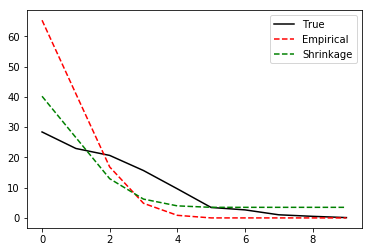

In [18]:
fig, ax = plt.subplots()
ax.plot(range(len(ee0)), ee0, 'black', label = 'True')
ax.plot(range(len(ee1)), ee1, 'r--', label = 'Empirical')
ax.plot(range(len(ee2)), ee2, 'g--', label = 'Shrinkage')

ax.legend(loc = 'best')
plt.show()